In [398]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

%matplotlib inline

# Initial Data Load:

In [399]:
df = pd.read_csv('../Data/to_model.csv', index_col = 0)

In [400]:
df.reset_index(drop = True, inplace = True)
print(df.shape)
df.head(5)

(5461, 99)


,Winner,R_fighter,Fighter,Height,Reach,Stance,Weight,age,loss,win,...,attendance,num_rounds,label,matches,matches.1,Reach_diff,Weight_diff,Height_diff,round_age,round_age.1
0,win,Justin Gaethje,Justin Gaethje,61.0,76.0,Orthodox,155.0,31.50,2.0,4.0,...,0.0,5,0,7.0,17.0,6.0,0.0,0.0,32.0,36.0
1,win,Henry Cejudo,Henry Cejudo,68.0,68.0,Orthodox,135.0,33.27,2.0,9.0,...,0.0,5,0,12.0,7.0,4.0,0.0,4.0,33.0,35.0
2,win,Francis Ngannou,Francis Ngannou,76.0,83.0,Orthodox,250.0,33.70,2.0,9.0,...,0.0,3,0,12.0,5.0,5.0,8.0,0.0,34.0,32.0
3,win,Calvin Kattar,Calvin Kattar,61.0,72.0,Orthodox,145.0,32.14,2.0,4.0,...,0.0,3,0,7.0,33.0,1.0,0.0,-8.0,32.0,34.0
4,win,Greg Hardy,Greg Hardy,77.0,80.0,Orthodox,265.0,31.80,2.0,2.0,...,0.0,3,0,6.0,2.0,6.0,15.0,5.0,32.0,33.0


In [416]:
df = df[df['label'] != 99999]
df.reset_index(inplace = True, drop = True)
df.shape

(5461, 99)

In [441]:
df['Stance'].fillna('Orthodox', inplace = True)
df['Stance.1'].fillna('Orthodox', inplace = True)
df['Stance'] = df['Stance'].apply(lambda x: x.strip())
df['Stance.1'] = df['Stance.1'].apply(lambda x: x.strip())

In [442]:
pd.set_option('display.max_rows', 100)
df.isna().any()

Winner                           False
R_fighter                        False
Fighter                          False
Height                           False
Reach                            False
Stance                           False
Weight                           False
age                              False
loss                             False
win                              False
draws                            False
streak                           False
cum_match_time                   False
avg_cum_KD                       False
avg_cum_Sub. att                 False
avg_cum_Pass                     False
avg_cum_Rev.                     False
avg_cum_Sig. str. Hits           False
avg_cum_Sig. str. Attempts       False
avg_cum_Total str. Hits          False
avg_cum_Total str. Attempts      False
avg_cum_Td Hits                  False
avg_cum_Td Attempts              False
avg_cum_Head Hits                False
avg_cum_Head Attempts            False
avg_cum_Body Hits        

In [443]:
df.columns

Index(['Winner', 'R_fighter', 'Fighter', 'Height', 'Reach', 'Stance', 'Weight',
       'age', 'loss', 'win', 'draws', 'streak', 'cum_match_time', 'avg_cum_KD',
       'avg_cum_Sub. att', 'avg_cum_Pass', 'avg_cum_Rev.',
       'avg_cum_Sig. str. Hits', 'avg_cum_Sig. str. Attempts',
       'avg_cum_Total str. Hits', 'avg_cum_Total str. Attempts',
       'avg_cum_Td Hits', 'avg_cum_Td Attempts', 'avg_cum_Head Hits',
       'avg_cum_Head Attempts', 'avg_cum_Body Hits', 'avg_cum_Body Attempts',
       'avg_cum_Leg Hits', 'avg_cum_Leg Attempts', 'avg_cum_Distance Hits',
       'avg_cum_Distance Attempts', 'avg_cum_Clinch Hits',
       'avg_cum_Clinch Attempts', 'avg_cum_Ground Hits',
       'avg_cum_Ground Attempts', 'eff_sig_str', 'eff_hits', 'eff_tds',
       'eff_head', 'eff_leg', 'eff_body', 'eff_distance', 'eff_clinch',
       'eff_ground', 'Fighter.1', 'Height.1', 'Reach.1', 'Stance.1',
       'Weight.1', 'age.1', 'loss.1', 'win.1', 'draws.1', 'streak.1',
       'cum_match_time.1', 'av

In [444]:
df.shape

(5461, 99)

# Prepare Data for Model

### One-hot-encode Categorical

In [445]:
from sklearn.preprocessing import MultiLabelBinarizer

In [446]:
mlb_weight = MultiLabelBinarizer()
mlb_weight.fit([df['WEIGHT_CLASS']])

MultiLabelBinarizer(classes=None, sparse_output=False)

In [447]:
weight_classes = pd.DataFrame(mlb_weight.transform([[item] for item in df['WEIGHT_CLASS']]))
weight_classes.columns = mlb_weight.classes_
weight_classes

,Bantamweight,Catch Weight,Featherweight,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Open Weight,Super Heavyweight,Welterweight,Women's Bantamweight,Women's Featherweight,Women's Flyweight,Women's Strawweight
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5456,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5457,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5458,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5459,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [448]:
weight_classes.columns

Index(['Bantamweight', 'Catch Weight', 'Featherweight', 'Flyweight',
       'Heavyweight', 'Light Heavyweight', 'Lightweight', 'Middleweight',
       'Open Weight', 'Super Heavyweight', 'Welterweight',
       'Women's Bantamweight', 'Women's Featherweight', 'Women's Flyweight',
       'Women's Strawweight'],
      dtype='object')

In [449]:
mlb_stance = MultiLabelBinarizer()
mlb_stance.fit([df['Stance.1']]) #Stance.1 includes all unique values of stance

MultiLabelBinarizer(classes=None, sparse_output=False)

In [450]:
stance = pd.DataFrame(mlb_stance.transform([[item] for item in df['Stance']]))
stance.columns = mlb_stance.classes_

stance1 = pd.DataFrame(mlb_stance.transform([[item] for item in df['Stance.1']]))
stance1.columns = ['{}.1'.format(item) for item in mlb_stance.classes_]

In [451]:
stance.columns

Index(['Open Stance', 'Orthodox', 'Sideways', 'Southpaw', 'Switch'], dtype='object')

In [452]:
final_data = pd.concat([df, weight_classes, stance, stance1], axis = 1)

### Final Drop:

In [453]:
final_data.columns

Index(['Winner', 'R_fighter', 'Fighter', 'Height', 'Reach', 'Stance', 'Weight',
       'age', 'loss', 'win',
       ...
       'Open Stance', 'Orthodox', 'Sideways', 'Southpaw', 'Switch',
       'Open Stance.1', 'Orthodox.1', 'Sideways.1', 'Southpaw.1', 'Switch.1'],
      dtype='object', length=124)

In [454]:
final_data.to_csv('../Data/model_ready.csv')

drop_columns = ['WEIGHT_CLASS', 'Stance', 'Stance.1', 'Winner', 'R_fighter', 'Fighter', 'Fighter.1', 
                'location', 'Height', 'Weight', 'Reach', 'Height.1', 'Weight.1', 'Reach.1','round_age', 
                'round_age.1', 'attendance']


final_data.drop(drop_columns, axis = 1, inplace = True)

# ML Models:

In [455]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import shap


In [456]:
X = final_data.loc[:, ~final_data.columns.isin(['label'])]
y = final_data.loc[:, 'label']

print(X.shape, y.shape)

(5461, 106) (5461,)


In [457]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1000, stratify = y)

In [458]:
list(X.columns)

['age',
 'loss',
 'win',
 'draws',
 'streak',
 'cum_match_time',
 'avg_cum_KD',
 'avg_cum_Sub. att',
 'avg_cum_Pass',
 'avg_cum_Rev.',
 'avg_cum_Sig. str. Hits',
 'avg_cum_Sig. str. Attempts',
 'avg_cum_Total str. Hits',
 'avg_cum_Total str. Attempts',
 'avg_cum_Td Hits',
 'avg_cum_Td Attempts',
 'avg_cum_Head Hits',
 'avg_cum_Head Attempts',
 'avg_cum_Body Hits',
 'avg_cum_Body Attempts',
 'avg_cum_Leg Hits',
 'avg_cum_Leg Attempts',
 'avg_cum_Distance Hits',
 'avg_cum_Distance Attempts',
 'avg_cum_Clinch Hits',
 'avg_cum_Clinch Attempts',
 'avg_cum_Ground Hits',
 'avg_cum_Ground Attempts',
 'eff_sig_str',
 'eff_hits',
 'eff_tds',
 'eff_head',
 'eff_leg',
 'eff_body',
 'eff_distance',
 'eff_clinch',
 'eff_ground',
 'age.1',
 'loss.1',
 'win.1',
 'draws.1',
 'streak.1',
 'cum_match_time.1',
 'avg_cum_KD.1',
 'avg_cum_Sub. att.1',
 'avg_cum_Pass.1',
 'avg_cum_Rev..1',
 'avg_cum_Sig. str. Hits.1',
 'avg_cum_Sig. str. Attempts.1',
 'avg_cum_Total str. Hits.1',
 'avg_cum_Total str. Attempts.1',
 'avg_cum_Td Hits.1',
 'avg_cum_Td Attempts.1',
 'avg_cum_Head Hits.1',
 'avg_cum_Head Attempts.1',
 'avg_cum_Body Hits.1',
 'avg_cum_Body Attempts.1',
 'avg_cum_Leg Hits.1',
 'avg_cum_Leg Attempts.1',
 'avg_cum_Distance Hits.1',
 'avg_cum_Distance Attempts.1',
 'avg_cum_Clinch Hits.1',
 'avg_cum_Clinch Attempts.1',
 'avg_cum_Ground Hits.1',
 'avg_cum_Ground Attempts.1',
 'eff_sig_str.1',
 'eff_hits.1',
 'eff_tds.1',
 'eff_head.1',
 'eff_leg.1',
 'eff_body.1',
 'eff_distance.1',
 'eff_clinch.1',
 'eff_ground.1',
 'title_bout',
 'num_rounds',
 'matches',
 'matches.1',
 'Reach_diff',
 'Weight_diff',
 'Height_diff',
 'Bantamweight',
 'Catch Weight',
 'Featherweight',
 'Flyweight',
 'Heavyweight',
 'Light Heavyweight',
 'Lightweight',
 'Middleweight',
 'Open Weight',
 'Super Heavyweight',
 'Welterweight',
 "Women's Bantamweight",
 "Women's Featherweight",
 "Women's Flyweight",
 "Women's Strawweight",
 'Open Stance',
 'Orthodox',
 'Sideways',
 'Southpaw',
 'Switch',
 'Open Stance.1',
 'Orthodox.1',
 'Sideways.1',
 'Southpaw.1',
 'Switch.1']

# Random Forest Classifier

In [459]:
rf_params = {
    'n_estimators': [100],
    'max_features': [20, 40, 60, 80, 100]
}

In [460]:
rfGrid = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, cv=5, verbose=1)

In [461]:
rfGrid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [462]:
pd.Series(rfGrid.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending = False)

avg_cum_Head Hits            0.031309
age                          0.029746
age.1                        0.024149
avg_cum_Total str. Hits.1    0.022711
avg_cum_Pass.1               0.018911
                               ...   
Open Weight                  0.000054
Open Stance.1                0.000018
Sideways.1                   0.000009
Sideways                     0.000000
Super Heavyweight            0.000000
Length: 106, dtype: float64

In [463]:
rfGrid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=100, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [464]:
rfGrid.score(X_test, y_test)

0.6120768526989936

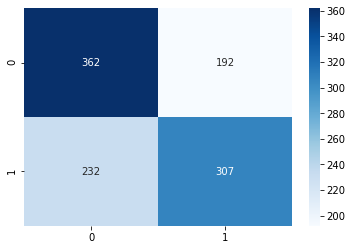

In [465]:
rf_roc = roc_auc_score(y_test, rfGrid.predict_proba(X_test)[:, 1])
rf_cm = confusion_matrix(y_test, rfGrid.predict(X_test))
sns.heatmap(rf_cm, annot=True, fmt = 'd', cmap = 'Blues');

# XGBoost

In [466]:
xgb_params = {
    'booster': ['gbtree', 'gblinear'],
    'eta': [.01, .05, .1, .15, .2, .3]
    
}

In [467]:
xgbGrid = GridSearchCV(XGBClassifier(), param_grid=xgb_params)

In [468]:
xgbGrid.fit(X_train, y_train)

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_con...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                   

In [472]:
xgbGrid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.05, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.0500000007, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [473]:
xgbGrid.score(X_test, y_test)

0.6303751143641354

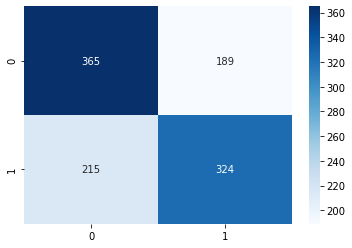

In [474]:
xgb_roc = roc_auc_score(y_test, xgbGrid.predict_proba(X_test)[:, 1])
xgb_cm = confusion_matrix(y_test, xgbGrid.predict(X_test))
sns.heatmap(xgb_cm, annot=True, fmt = 'd', cmap = 'Blues');

In [475]:
explainer = shap.TreeExplainer(xgbGrid.best_estimator_)
shap_values = explainer.shap_values(X_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [476]:
tree_explainer = shap.TreeExplainer(rfGrid.best_estimator_)
tree_shap_values = explainer.shap_values(X_train)

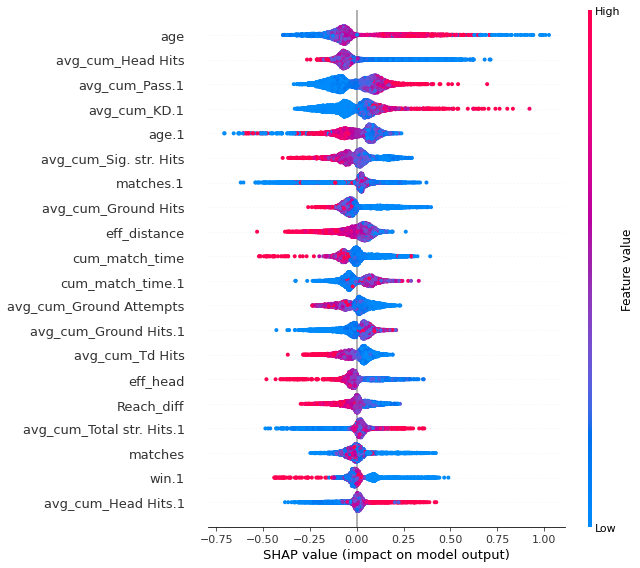

In [477]:
shap.summary_plot(shap_values, X_train)

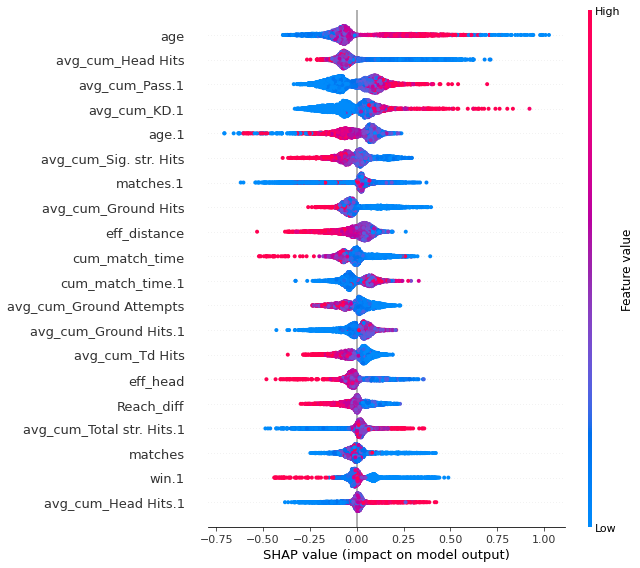

In [478]:
shap.summary_plot(tree_shap_values, X_train)

High SHAP values indicate value closer to 1. In this graph, this shows high values of age.0 (indicated by red) lean towards high values of 1 winning. Similarily, high values of age.1 indicate values closer to 0 winning.  

# Remodel, removing high cardinal categorical variables

In [479]:
continuous_columns = ['age','loss','win','draws','streak','cum_match_time','avg_cum_KD',
                 'avg_cum_Sub. att', 'avg_cum_Pass','avg_cum_Rev.','avg_cum_Sig. str. Hits','avg_cum_Sig. str. Attempts',
                 'avg_cum_Total str. Hits','avg_cum_Total str. Attempts','avg_cum_Td Hits','avg_cum_Td Attempts',
                 'avg_cum_Head Hits','avg_cum_Head Attempts','avg_cum_Body Hits','avg_cum_Body Attempts',
                 'avg_cum_Leg Hits','avg_cum_Leg Attempts','avg_cum_Distance Hits','avg_cum_Distance Attempts',
                 'avg_cum_Clinch Hits','avg_cum_Clinch Attempts','avg_cum_Ground Hits','avg_cum_Ground Attempts',
                 'eff_sig_str','eff_hits','eff_tds','eff_head','eff_leg','eff_body','eff_distance','eff_clinch','eff_ground',
                 'age.1','loss.1','win.1','draws.1','streak.1','cum_match_time.1',
                 'avg_cum_KD.1','avg_cum_Sub. att.1','avg_cum_Pass.1','avg_cum_Rev..1','avg_cum_Sig. str. Hits.1',
                 'avg_cum_Sig. str. Attempts.1','avg_cum_Total str. Hits.1','avg_cum_Total str. Attempts.1',
                 'avg_cum_Td Hits.1','avg_cum_Td Attempts.1','avg_cum_Head Hits.1','avg_cum_Head Attempts.1',
                 'avg_cum_Body Hits.1','avg_cum_Body Attempts.1','avg_cum_Leg Hits.1','avg_cum_Leg Attempts.1',
                 'avg_cum_Distance Hits.1','avg_cum_Distance Attempts.1','avg_cum_Clinch Hits.1','avg_cum_Clinch Attempts.1',
                 'avg_cum_Ground Hits.1','avg_cum_Ground Attempts.1','eff_sig_str.1','eff_hits.1','eff_tds.1','eff_head.1',
                 'eff_leg.1','eff_body.1','eff_distance.1','eff_clinch.1','eff_ground.1','num_rounds','matches',
                 'matches.1','Reach_diff','Weight_diff','Height_diff'
]

In [480]:
X_continuous_train = X_train[continuous_columns]
X_continuous_test = X_test[continuous_columns]

In [481]:
rf_continuous = RandomForestClassifier(n_estimators=100, max_features=80)
rf_continuous.fit(X_continuous_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=80, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [482]:
xgb_continuous = XGBClassifier(eta=.1)
xgb_continuous.fit(X_continuous_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.100000001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [484]:
print("Accuracies:")
print(accuracy_score(y_test, rfGrid.best_estimator_.predict(X_test)))  
print(accuracy_score(y_test, xgbGrid.best_estimator_.predict(X_test)))    
print(accuracy_score(y_test, rf_continuous.predict(X_continuous_test)))
print(accuracy_score(y_test, xgb_continuous.predict(X_continuous_test)))
print('\n')
print("ROC AUC:")
print(roc_auc_score(y_test, rfGrid.best_estimator_.predict_proba(X_test)[:, 1]))  
print(roc_auc_score(y_test, xgbGrid.best_estimator_.predict_proba(X_test)[:, 1]))    
print(roc_auc_score(y_test, rf_continuous.predict_proba(X_continuous_test)[:, 1]))
print(roc_auc_score(y_test, xgb_continuous.predict_proba(X_continuous_test)[:, 1]))

Accuracies:
0.6120768526989936
0.6303751143641354
0.6157365050320219
0.6358645928636779


ROC AUC:
0.6729318901830506
0.6944569097740835
0.6720226653181784
0.7000864014788717


# Scale the Data:

In [485]:
from sklearn.preprocessing import StandardScaler

In [486]:
scale_columns = ['age','loss','win','draws','streak','cum_match_time','avg_cum_KD',
                 'avg_cum_Sub. att', 'avg_cum_Pass','avg_cum_Rev.','avg_cum_Sig. str. Hits','avg_cum_Sig. str. Attempts',
                 'avg_cum_Total str. Hits','avg_cum_Total str. Attempts','avg_cum_Td Hits','avg_cum_Td Attempts',
                 'avg_cum_Head Hits','avg_cum_Head Attempts','avg_cum_Body Hits','avg_cum_Body Attempts',
                 'avg_cum_Leg Hits','avg_cum_Leg Attempts','avg_cum_Distance Hits','avg_cum_Distance Attempts',
                 'avg_cum_Clinch Hits','avg_cum_Clinch Attempts','avg_cum_Ground Hits','avg_cum_Ground Attempts',
                 'eff_sig_str','eff_hits','eff_tds','eff_head','eff_leg','eff_body','eff_distance','eff_clinch','eff_ground',
                 'age.1','loss.1','win.1','draws.1','streak.1','cum_match_time.1',
                 'avg_cum_KD.1','avg_cum_Sub. att.1','avg_cum_Pass.1','avg_cum_Rev..1','avg_cum_Sig. str. Hits.1',
                 'avg_cum_Sig. str. Attempts.1','avg_cum_Total str. Hits.1','avg_cum_Total str. Attempts.1',
                 'avg_cum_Td Hits.1','avg_cum_Td Attempts.1','avg_cum_Head Hits.1','avg_cum_Head Attempts.1',
                 'avg_cum_Body Hits.1','avg_cum_Body Attempts.1','avg_cum_Leg Hits.1','avg_cum_Leg Attempts.1',
                 'avg_cum_Distance Hits.1','avg_cum_Distance Attempts.1','avg_cum_Clinch Hits.1','avg_cum_Clinch Attempts.1',
                 'avg_cum_Ground Hits.1','avg_cum_Ground Attempts.1','eff_sig_str.1','eff_hits.1','eff_tds.1','eff_head.1',
                 'eff_leg.1','eff_body.1','eff_distance.1','eff_clinch.1','eff_ground.1','num_rounds','matches',
                 'matches.1','Reach_diff','Weight_diff','Height_diff'
]

unscale_columns = [item for item in X.columns if item not in scale_columns]
unscale_columns

['title_bout',
 'Bantamweight',
 'Catch Weight',
 'Featherweight',
 'Flyweight',
 'Heavyweight',
 'Light Heavyweight',
 'Lightweight',
 'Middleweight',
 'Open Weight',
 'Super Heavyweight',
 'Welterweight',
 "Women's Bantamweight",
 "Women's Featherweight",
 "Women's Flyweight",
 "Women's Strawweight",
 'Open Stance',
 'Orthodox',
 'Sideways',
 'Southpaw',
 'Switch',
 'Open Stance.1',
 'Orthodox.1',
 'Sideways.1',
 'Southpaw.1',
 'Switch.1']

In [487]:
scaler = StandardScaler()
X_scale_train = pd.DataFrame(scaler.fit_transform(X_train[scale_columns]), index=X_train.index)
X_scale_train.columns = scale_columns

In [488]:
X_scale_train = pd.concat([X_scale_train, X_train[unscale_columns]], axis = 1)
X_scale_train

,age,loss,win,draws,streak,cum_match_time,avg_cum_KD,avg_cum_Sub. att,avg_cum_Pass,avg_cum_Rev.,...,Open Stance,Orthodox,Sideways,Southpaw,Switch,Open Stance.1,Orthodox.1,Sideways.1,Southpaw.1,Switch.1
4341,-1.184726,-0.827200,-0.858168,-0.273598,-0.232609,-0.809799,-0.193875,-0.416216,-0.672728,-0.425434,...,0,1,0,0,0,0,1,0,0,0
962,0.796716,-0.333996,-0.858168,-0.273598,-0.748101,-0.748398,-0.193875,-0.416216,0.442394,-0.425434,...,0,1,0,0,0,0,0,0,0,1
1353,-0.176298,-0.827200,-0.858168,-0.273598,-0.232609,-0.635318,-0.193875,-0.416216,-0.360121,-0.425434,...,0,1,0,0,0,0,1,0,0,0
4290,0.208186,-0.827200,0.481914,3.131181,2.344851,0.231117,-0.086218,0.090271,1.240242,0.719741,...,0,1,0,0,0,0,1,0,0,0
877,-0.714239,-0.333996,-0.858168,-0.273598,-0.748101,-0.635318,-0.193875,-0.416216,-0.360121,-0.425434,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4324,1.646628,0.159207,0.213898,-0.273598,0.798375,0.726930,-0.118515,-0.182453,-0.280802,-0.151588,...,0,1,0,0,0,0,1,0,0,0
1010,0.083397,-0.827200,-0.858168,-0.273598,-0.232609,-0.816451,-0.193875,-0.416216,-0.672728,-0.425434,...,0,1,0,0,0,0,0,0,1,0
4206,-0.415758,-0.827200,-0.322135,-0.273598,0.798375,-0.619627,-0.193875,-0.065571,-0.084840,-0.425434,...,0,0,0,1,0,0,1,0,0,0
370,0.263835,1.638818,0.749930,3.131181,-0.748101,0.950361,-0.093395,-0.366124,-0.196818,-0.425434,...,0,0,0,1,0,0,1,0,0,0


In [489]:
joblib.dump(scaler, 'scaler')

['scaler']

In [490]:
X_scale_test = pd.DataFrame(scaler.transform(X_test[scale_columns]), index=X_test.index)
X_scale_test.columns = scale_columns

X_scale_test = pd.concat([X_scale_test, X_test[unscale_columns]], axis = 1)
X_scale_test

,age,loss,win,draws,streak,cum_match_time,avg_cum_KD,avg_cum_Sub. att,avg_cum_Pass,avg_cum_Rev.,...,Open Stance,Orthodox,Sideways,Southpaw,Switch,Open Stance.1,Orthodox.1,Sideways.1,Southpaw.1,Switch.1
4877,-0.869381,-0.333996,0.481914,-0.273598,1.829359,0.278874,-0.193875,0.312902,1.025616,0.296524,...,0,1,0,0,0,0,0,0,1,0
3512,0.299248,-0.827200,-0.858168,-0.273598,-0.232609,-0.702347,-0.193875,-0.416216,2.276045,-0.425434,...,0,0,0,1,0,0,1,0,0,0
485,-0.363481,-0.333996,-0.590151,-0.273598,0.282883,-0.606835,-0.193875,-0.082269,-0.672728,-0.425434,...,0,0,0,1,0,0,1,0,0,0
3538,-0.680512,-0.827200,-0.858168,-0.273598,-0.232609,-0.843740,-0.193875,-0.416216,-0.672728,-0.425434,...,0,1,0,0,0,0,0,0,1,0
1829,0.422350,-0.333996,0.481914,-0.273598,2.344851,-0.228537,-0.010858,0.440915,0.526378,-0.425434,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,0.464508,0.652411,-0.322135,-0.273598,-1.263593,0.009392,-0.193875,0.112534,-0.140829,0.520580,...,0,0,0,1,0,0,1,0,0,0
293,0.211558,-0.333996,-0.590151,-0.273598,-0.748101,-0.500918,-0.035978,-0.416216,-0.672728,-0.425434,...,0,1,0,0,0,0,1,0,0,0
3962,0.186263,-0.333996,-0.590151,-0.273598,0.282883,-0.576134,-0.193875,-0.416216,-0.168824,-0.425434,...,0,0,0,1,0,0,1,0,0,0
4482,-0.388776,-0.827200,-0.590151,-0.273598,0.282883,-0.830607,-0.193875,2.717322,3.269857,-0.425434,...,0,1,0,0,0,0,0,0,1,0


In [491]:
print(X_scale_test.shape, X_scale_train.shape)

(1093, 106) (4368, 106)


# Logistic Regression

In [363]:
log_params = [{'penalty': ['l1', 'l2'],
               'C': [.25, .5, .75, 1],
               'max_iter': [1000],
              'solver': ['liblinear']}    
    ]

logGrid = GridSearchCV(LogisticRegression(), param_grid=log_params, cv=5, verbose=1)

In [364]:
logGrid.fit(X_scale_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    4.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.25, 0.5, 0.75, 1], 'max_iter': [1000],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [365]:
logGrid.best_estimator_

LogisticRegression(C=0.25, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [366]:
logGrid.score(X_scale_test, y_test)

0.6001829826166514

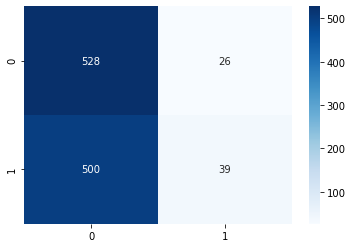

In [367]:
log_roc = roc_auc_score(y_test, logGrid.predict_proba(X_test)[:, 1])
log_cm = confusion_matrix(y_test, logGrid.predict(X_test))
sns.heatmap(log_cm, annot=True, fmt = 'd', cmap = 'Blues');

ROC AUC LOG:  0.5553069931615574
ROC AUC RF:  0.6616226733555253
ROC AUC XGB:  0.704450011051352


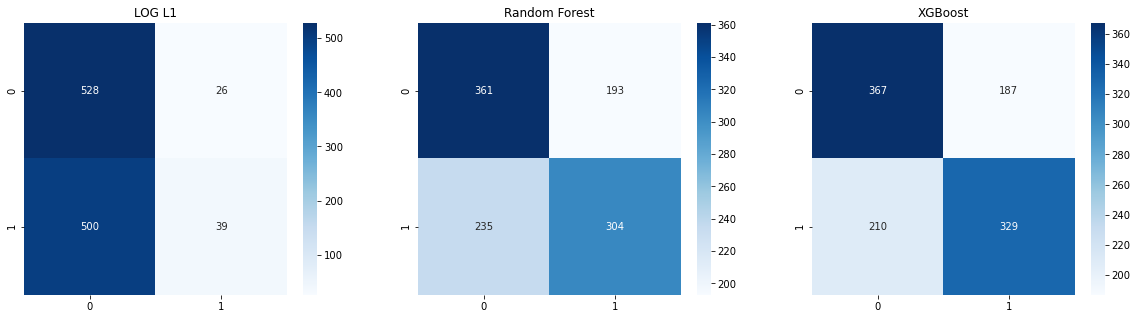

In [368]:
f, ax = plt.subplots(1, 3, figsize = [20, 5])

sns.heatmap(log_cm, annot=True, fmt = 'd', cmap = 'Blues', ax = ax[0])
sns.heatmap(rf_cm, annot=True, fmt = 'd', cmap = 'Blues', ax = ax[1])
sns.heatmap(xgb_cm, annot=True, fmt = 'd', cmap = 'Blues', ax = ax[2]);

ax[0].set_title('LOG L1')
ax[1].set_title('Random Forest')
ax[2].set_title('XGBoost')

#Relatively similar performance

print('ROC AUC LOG: ', log_roc)
print('ROC AUC RF: ', rf_roc)
print('ROC AUC XGB: ', xgb_roc)

# Blended Model:

In [369]:
X_T, X_val, y_T, y_val = train_test_split(X_train, y_train, test_size = .4, random_state = 1000, stratify = y_train)

In [370]:
log_unscale_params = {
    'max_iter': [5000],
    'C': [.25, .5, .75, 1],
    'solver': ['liblinear']
}

unscaleLogGrid = GridSearchCV(LogisticRegression(), param_grid=log_unscale_params)
unscaleLogGrid.fit(X_T, y_T)

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.25, 0.5, 0.75, 1], 'max_iter': [5000],
                         'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [371]:
blend_rf = RandomForestClassifier(n_estimators=100, max_features=100)
blend_rf.fit(X_T, y_T)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=100, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [372]:
blend_xgb = XGBClassifier(eta=.1)
blend_xgb.fit(X_T, y_T)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.100000001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

### Create Features:

In [373]:
blend_log_predictions = pd.Series(unscaleLogGrid.predict_proba(X_val)[:, 1], index=X_val.index)
blend_rf_predictions = pd.Series(blend_rf.predict_proba(X_val)[:, 1], index=X_val.index)
blend_xgb_predictions = pd.Series(blend_xgb.predict_proba(X_val)[:, 1], index=X_val.index)

### Create Test-set

In [374]:
print('Accuracies:')
print('LOG:', unscaleLogGrid.score(X_val, y_val), '\n')
print('RF:', blend_rf.score(X_val, y_val), '\n')
print('XGB:', blend_xgb.score(X_val, y_val), '\n')

blend_log_test = pd.Series(unscaleLogGrid.predict_proba(X_test)[:, 1], index = X_test.index)
blend_rf_test = pd.Series(blend_rf.predict_proba(X_test)[:, 1], index = X_test.index)
blend_xgb_test = pd.Series(blend_xgb.predict_proba(X_test)[:, 1], index = X_test.index)

X_blend_test = pd.concat([blend_log_test, blend_rf_test, blend_xgb_test], axis = 1)
X_blend_test.columns = ['LOG', 'RF', 'XGB']

Accuracies:
LOG: 0.6178489702517163 

RF: 0.6310068649885584 

XGB: 0.63558352402746 



In [375]:
blended_features = pd.concat([blend_log_predictions, blend_rf_predictions, blend_xgb_predictions, y_val], axis = 1)
blended_features.columns = ['LOG', 'RF', 'XGB', 'label']
blended_features

,LOG,RF,XGB,label
2639,0.317167,0.61,0.616509,1
2092,0.419613,0.53,0.340365,1
2707,0.689815,0.47,0.133565,1
1091,0.544511,0.53,0.244544,0
4453,0.031510,0.08,0.040800,0
...,...,...,...,...
1799,0.454147,0.36,0.491598,0
3885,0.253976,0.43,0.468379,0
1888,0.606777,0.52,0.523255,1
563,0.248622,0.35,0.554168,1


In [376]:
blendLog = LogisticRegression()
blendLog.fit(blended_features.iloc[:, 0:3], blended_features.iloc[:, 3])

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Blended Accuracy: 0.6303751143641354
Blended ROC AUC: 0.6888508603310047


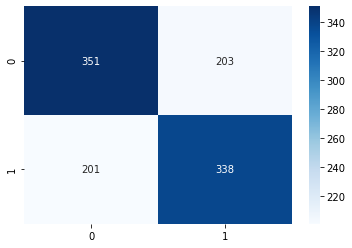

In [378]:
print('Blended Accuracy:', blendLog.score(X_blend_test, y_test))
print('Blended ROC AUC:', roc_auc_score(y_test, blendLog.predict_proba(X_blend_test)[:, 1]))
blend_cm = confusion_matrix(y_test, blendLog.predict(X_blend_test))
sns.heatmap(blend_cm, annot=True, fmt = 'd', cmap = 'Blues');

# Neural Network:

In [492]:
from tensorflow.keras.layers import Layer, Dense, Input, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


In [493]:
def get_model(dropout, n_size, input_size):
    model = Sequential()
    model.add(Dense(n_size, input_dim=input_size, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    

    model.compile(loss = 'binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

    return model


# GridSearch

In [381]:
nn_params = {
    'dropout': [.2, .4, .6, .8],
    'n_size': [16, 32, 64, 128],
    'input_size': [X_scale_train.shape[1]],
    'epochs': [20]
}


In [382]:
mod = KerasClassifier(build_fn=get_model)
keras_grid = GridSearchCV(estimator=mod, param_grid=nn_params)

In [383]:
keras_grid.fit(X_scale_train, np.array(y_train), batch_size=32)

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.


Train on 2912 samples
Epoch 1/20
2912/2912 [==============================] - 0s 119us/sample - loss: 0.7234 - accuracy: 0.5512
Epoch 2/20
2912/2912 [==============================] - 0s 40us/sample - loss: 0.6739 - accuracy: 0.5807
Epoch 3/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.6566 - accuracy: 0.6037
Epoch 4/20
2912/2912 [==============================] - ETA: 0s - loss: 0.6409 - accuracy: 0.62 - 0s 40us/sample - loss: 0.6400 - accuracy: 0.6226
Epoch 5/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.6312 - accuracy: 0.6233
Epoch 6/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.6297 - accuracy: 0.6356
Epoch 7/20
2912/2912 [==============================] - 0s 37us/sample - loss: 0.6212 - accuracy: 0.6415
Epoch 8/20
2912/2912 [==============================] - 0s 36us/sample - loss: 0.6202 - accuracy: 0.6508
Epoch 9/20
2912/2912 [==============================] - 0s 37us/sample - loss: 0.6190 - accurac

2912/2912 [==============================] - 0s 35us/sample - loss: 0.5693 - accuracy: 0.6930
Epoch 15/20
2912/2912 [==============================] - 0s 38us/sample - loss: 0.5708 - accuracy: 0.6813
Epoch 16/20
2912/2912 [==============================] - 0s 37us/sample - loss: 0.5684 - accuracy: 0.6868
Epoch 17/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.5654 - accuracy: 0.7040
Epoch 18/20
2912/2912 [==============================] - 0s 37us/sample - loss: 0.5657 - accuracy: 0.7009
Epoch 19/20
2912/2912 [==============================] - 0s 36us/sample - loss: 0.5534 - accuracy: 0.7033
Epoch 20/20
1456/1456 [==============================] - 0s 58us/sample - loss: 0.6559 - accuracy: 0.6284
Train on 2912 samples
Epoch 1/20
2912/2912 [==============================] - 0s 113us/sample - loss: 0.7342 - accuracy: 0.5440
Epoch 2/20
2912/2912 [==============================] - 0s 39us/sample - loss: 0.6655 - accuracy: 0.5951
Epoch 3/20
2912/2912 [===============

2912/2912 [==============================] - 0s 39us/sample - loss: 0.5890 - accuracy: 0.6786
Epoch 8/20
2912/2912 [==============================] - 0s 39us/sample - loss: 0.5784 - accuracy: 0.7009
Epoch 9/20
2912/2912 [==============================] - 0s 40us/sample - loss: 0.5714 - accuracy: 0.6923
Epoch 10/20
2912/2912 [==============================] - 0s 43us/sample - loss: 0.5677 - accuracy: 0.7064
Epoch 11/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.5577 - accuracy: 0.7167
Epoch 12/20
2912/2912 [==============================] - 0s 42us/sample - loss: 0.5552 - accuracy: 0.7112
Epoch 13/20
2912/2912 [==============================] - 0s 40us/sample - loss: 0.5500 - accuracy: 0.7177
Epoch 14/20
2912/2912 [==============================] - 0s 43us/sample - loss: 0.5473 - accuracy: 0.7163
Epoch 15/20
2912/2912 [==============================] - 0s 39us/sample - loss: 0.5254 - accuracy: 0.7380
Epoch 16/20
2912/2912 [==============================] - 0s 

1456/1456 [==============================] - 0s 61us/sample - loss: 0.7124 - accuracy: 0.6223
Train on 2912 samples
Epoch 1/20
2912/2912 [==============================] - 0s 135us/sample - loss: 0.6843 - accuracy: 0.5824
Epoch 2/20
2912/2912 [==============================] - 0s 44us/sample - loss: 0.6477 - accuracy: 0.6157
Epoch 3/20
2912/2912 [==============================] - 0s 48us/sample - loss: 0.6195 - accuracy: 0.6398
Epoch 4/20
2912/2912 [==============================] - 0s 45us/sample - loss: 0.6053 - accuracy: 0.6597
Epoch 5/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.5882 - accuracy: 0.6769
Epoch 6/20
2912/2912 [==============================] - 0s 37us/sample - loss: 0.5837 - accuracy: 0.6813
Epoch 7/20
2912/2912 [==============================] - 0s 39us/sample - loss: 0.5707 - accuracy: 0.6981
Epoch 8/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.5620 - accuracy: 0.6971
Epoch 9/20
2912/2912 [=====================

2912/2912 [==============================] - 0s 38us/sample - loss: 0.6240 - accuracy: 0.6435
Epoch 14/20
2912/2912 [==============================] - 0s 37us/sample - loss: 0.6207 - accuracy: 0.6494
Epoch 15/20
2912/2912 [==============================] - 0s 38us/sample - loss: 0.6243 - accuracy: 0.6315
Epoch 16/20
2912/2912 [==============================] - 0s 38us/sample - loss: 0.6141 - accuracy: 0.6604
Epoch 17/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.6151 - accuracy: 0.6525
Epoch 18/20
2912/2912 [==============================] - 0s 38us/sample - loss: 0.6078 - accuracy: 0.6604
Epoch 19/20
2912/2912 [==============================] - 0s 40us/sample - loss: 0.6075 - accuracy: 0.6607
Epoch 20/20
1456/1456 [==============================] - 0s 63us/sample - loss: 0.6299 - accuracy: 0.6271
Train on 2912 samples
Epoch 1/20
2912/2912 [==============================] - 0s 110us/sample - loss: 0.7737 - accuracy: 0.5244
Epoch 2/20
2912/2912 [==============

2912/2912 [==============================] - 0s 38us/sample - loss: 0.6217 - accuracy: 0.6398
Epoch 7/20
2912/2912 [==============================] - 0s 37us/sample - loss: 0.6118 - accuracy: 0.6542
Epoch 8/20
2912/2912 [==============================] - 0s 35us/sample - loss: 0.6053 - accuracy: 0.6597
Epoch 9/20
2912/2912 [==============================] - 0s 38us/sample - loss: 0.6068 - accuracy: 0.6538
Epoch 10/20
2912/2912 [==============================] - 0s 36us/sample - loss: 0.5856 - accuracy: 0.6837
Epoch 11/20
2912/2912 [==============================] - 0s 37us/sample - loss: 0.5859 - accuracy: 0.6786
Epoch 12/20
2912/2912 [==============================] - 0s 35us/sample - loss: 0.5869 - accuracy: 0.6769
Epoch 13/20
2912/2912 [==============================] - 0s 38us/sample - loss: 0.5846 - accuracy: 0.6793
Epoch 14/20
2912/2912 [==============================] - 0s 35us/sample - loss: 0.5730 - accuracy: 0.6913
Epoch 15/20
2912/2912 [==============================] - 0s 3

1456/1456 [==============================] - 0s 60us/sample - loss: 0.6586 - accuracy: 0.6319
Train on 2912 samples
Epoch 1/20
2912/2912 [==============================] - 0s 117us/sample - loss: 0.6829 - accuracy: 0.5834
Epoch 2/20
2912/2912 [==============================] - 0s 43us/sample - loss: 0.6514 - accuracy: 0.6257
Epoch 3/20
2912/2912 [==============================] - 0s 45us/sample - loss: 0.6281 - accuracy: 0.6411
Epoch 4/20
2912/2912 [==============================] - 0s 43us/sample - loss: 0.6131 - accuracy: 0.6453
Epoch 5/20
2912/2912 [==============================] - 0s 44us/sample - loss: 0.6000 - accuracy: 0.6614
Epoch 6/20
2912/2912 [==============================] - 0s 42us/sample - loss: 0.5896 - accuracy: 0.6844
Epoch 7/20
2912/2912 [==============================] - 0s 40us/sample - loss: 0.5866 - accuracy: 0.6844
Epoch 8/20
2912/2912 [==============================] - 0s 39us/sample - loss: 0.5811 - accuracy: 0.6830
Epoch 9/20
2912/2912 [=====================

2912/2912 [==============================] - 0s 35us/sample - loss: 0.6395 - accuracy: 0.6126
Epoch 14/20
2912/2912 [==============================] - 0s 37us/sample - loss: 0.6383 - accuracy: 0.6198
Epoch 15/20
2912/2912 [==============================] - 0s 35us/sample - loss: 0.6362 - accuracy: 0.6277
Epoch 16/20
2912/2912 [==============================] - 0s 36us/sample - loss: 0.6286 - accuracy: 0.6315
Epoch 17/20
2912/2912 [==============================] - 0s 34us/sample - loss: 0.6311 - accuracy: 0.6394
Epoch 18/20
2912/2912 [==============================] - 0s 35us/sample - loss: 0.6238 - accuracy: 0.6336
Epoch 19/20
2912/2912 [==============================] - 0s 37us/sample - loss: 0.6279 - accuracy: 0.6429
Epoch 20/20
1456/1456 [==============================] - 0s 62us/sample - loss: 0.6566 - accuracy: 0.6099
Train on 2912 samples
Epoch 1/20
2912/2912 [==============================] - 0s 110us/sample - loss: 0.8661 - accuracy: 0.5258
Epoch 2/20
2912/2912 [==============

2912/2912 [==============================] - 0s 36us/sample - loss: 0.6479 - accuracy: 0.6071
Epoch 7/20
2912/2912 [==============================] - 0s 37us/sample - loss: 0.6476 - accuracy: 0.6157
Epoch 8/20
2912/2912 [==============================] - 0s 36us/sample - loss: 0.6432 - accuracy: 0.6219
Epoch 9/20
2912/2912 [==============================] - 0s 35us/sample - loss: 0.6472 - accuracy: 0.6140
Epoch 10/20
2912/2912 [==============================] - 0s 35us/sample - loss: 0.6397 - accuracy: 0.6174
Epoch 11/20
2912/2912 [==============================] - 0s 34us/sample - loss: 0.6331 - accuracy: 0.6271
Epoch 12/20
2912/2912 [==============================] - 0s 35us/sample - loss: 0.6322 - accuracy: 0.6360
Epoch 13/20
2912/2912 [==============================] - 0s 36us/sample - loss: 0.6306 - accuracy: 0.6384
Epoch 14/20
2912/2912 [==============================] - 0s 36us/sample - loss: 0.6289 - accuracy: 0.6315
Epoch 15/20
2912/2912 [==============================] - 0s 3

1456/1456 [==============================] - 0s 69us/sample - loss: 0.6299 - accuracy: 0.6188
Train on 2912 samples
Epoch 1/20
2912/2912 [==============================] - 0s 119us/sample - loss: 0.7592 - accuracy: 0.5608
Epoch 2/20
2912/2912 [==============================] - 0s 44us/sample - loss: 0.6843 - accuracy: 0.5965
Epoch 3/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.6663 - accuracy: 0.6075
Epoch 4/20
2912/2912 [==============================] - 0s 39us/sample - loss: 0.6466 - accuracy: 0.6192
Epoch 5/20
2912/2912 [==============================] - 0s 40us/sample - loss: 0.6364 - accuracy: 0.6336
Epoch 6/20
2912/2912 [==============================] - 0s 39us/sample - loss: 0.6279 - accuracy: 0.6477
Epoch 7/20
2912/2912 [==============================] - 0s 38us/sample - loss: 0.6163 - accuracy: 0.6552
Epoch 8/20
2912/2912 [==============================] - 0s 42us/sample - loss: 0.5985 - accuracy: 0.6645
Epoch 9/20
2912/2912 [=====================

2912/2912 [==============================] - 0s 36us/sample - loss: 0.6553 - accuracy: 0.5862
Epoch 14/20
2912/2912 [==============================] - 0s 35us/sample - loss: 0.6563 - accuracy: 0.5913
Epoch 15/20
2912/2912 [==============================] - 0s 35us/sample - loss: 0.6547 - accuracy: 0.6075
Epoch 16/20
2912/2912 [==============================] - 0s 34us/sample - loss: 0.6541 - accuracy: 0.5979
Epoch 17/20
2912/2912 [==============================] - 0s 35us/sample - loss: 0.6524 - accuracy: 0.6016
Epoch 18/20
2912/2912 [==============================] - 0s 35us/sample - loss: 0.6505 - accuracy: 0.5920
Epoch 19/20
2912/2912 [==============================] - 0s 34us/sample - loss: 0.6500 - accuracy: 0.6013
Epoch 20/20
1456/1456 [==============================] - 0s 61us/sample - loss: 0.6438 - accuracy: 0.6257
Train on 2912 samples
Epoch 1/20
2912/2912 [==============================] - 0s 115us/sample - loss: 1.0103 - accuracy: 0.5000
Epoch 2/20
2912/2912 [==============

2912/2912 [==============================] - 0s 34us/sample - loss: 0.6840 - accuracy: 0.5786
Epoch 7/20
2912/2912 [==============================] - 0s 35us/sample - loss: 0.6763 - accuracy: 0.5810
Epoch 8/20
2912/2912 [==============================] - 0s 34us/sample - loss: 0.6609 - accuracy: 0.5821
Epoch 9/20
2912/2912 [==============================] - 0s 36us/sample - loss: 0.6643 - accuracy: 0.5862
Epoch 10/20
2912/2912 [==============================] - 0s 35us/sample - loss: 0.6578 - accuracy: 0.6092
Epoch 11/20
2912/2912 [==============================] - 0s 34us/sample - loss: 0.6514 - accuracy: 0.6150
Epoch 12/20
2912/2912 [==============================] - 0s 39us/sample - loss: 0.6475 - accuracy: 0.6144
Epoch 13/20
2912/2912 [==============================] - 0s 35us/sample - loss: 0.6407 - accuracy: 0.6137
Epoch 14/20
2912/2912 [==============================] - 0s 36us/sample - loss: 0.6457 - accuracy: 0.6223
Epoch 15/20
2912/2912 [==============================] - 0s 3

1456/1456 [==============================] - 0s 65us/sample - loss: 0.6501 - accuracy: 0.6120
Train on 2912 samples
Epoch 1/20
2912/2912 [==============================] - 0s 114us/sample - loss: 0.9510 - accuracy: 0.5216
Epoch 2/20
2912/2912 [==============================] - 0s 43us/sample - loss: 0.8285 - accuracy: 0.5395
Epoch 3/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.7561 - accuracy: 0.5481
Epoch 4/20
2912/2912 [==============================] - 0s 42us/sample - loss: 0.7145 - accuracy: 0.5907
Epoch 5/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.6949 - accuracy: 0.5786
Epoch 6/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.6886 - accuracy: 0.5817
Epoch 7/20
2912/2912 [==============================] - 0s 36us/sample - loss: 0.6799 - accuracy: 0.5968
Epoch 8/20
2912/2912 [==============================] - 0s 38us/sample - loss: 0.6617 - accuracy: 0.6099
Epoch 9/20
2912/2912 [=====================

2912/2912 [==============================] - 0s 40us/sample - loss: 0.6285 - accuracy: 0.6384
Epoch 14/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.6213 - accuracy: 0.6580
Epoch 15/20
2912/2912 [==============================] - 0s 39us/sample - loss: 0.6262 - accuracy: 0.6415
Epoch 16/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.6233 - accuracy: 0.6535
Epoch 17/20
2912/2912 [==============================] - 0s 39us/sample - loss: 0.6158 - accuracy: 0.6463
Epoch 18/20
2912/2912 [==============================] - 0s 38us/sample - loss: 0.6126 - accuracy: 0.6415
Epoch 19/20
2912/2912 [==============================] - 0s 39us/sample - loss: 0.6165 - accuracy: 0.6542
Epoch 20/20
1456/1456 [==============================] - 0s 63us/sample - loss: 0.6286 - accuracy: 0.6277
Train on 4368 samples
Epoch 1/20
4368/4368 [==============================] - 0s 105us/sample - loss: 0.8406 - accuracy: 0.5234
Epoch 2/20
4368/4368 [==============

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x00000222385FFEC8>,
             iid='warn', n_jobs=None,
             param_grid={'dropout': [0.2, 0.4, 0.6, 0.8], 'epochs': [20],
                         'input_size': [108], 'n_size': [16, 32, 64, 128]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [384]:
keras_grid.best_estimator_.get_params()

{'dropout': 0.8,
 'epochs': 20,
 'input_size': 108,
 'n_size': 64,
 'build_fn': <function __main__.get_model(dropout, n_size, input_size)>}

In [385]:
sum(y_test == (keras_grid.predict_proba(X_scale_test)[:, 1] > .5).flatten().astype(int)) / len(y_test)

0.6239707227813358

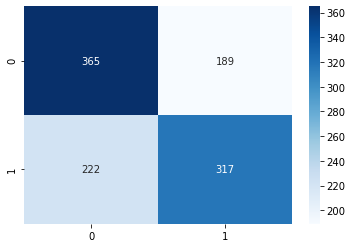

In [386]:
ann_cm = confusion_matrix(y_test, keras_grid.predict(X_scale_test))
sns.heatmap(ann_cm, annot=True, fmt = 'd', cmap = 'Blues');

# Removing unscaled factors:

In [494]:
X_continuous_train = X_scale_train.loc[:, scale_columns]
X_continuous_test = X_scale_test.loc[:, scale_columns]

In [495]:
nn_params = {
    'dropout': [.2, .4, .6, .8],
    'n_size': [16, 32, 64, 128],
    'input_size': [X_continuous_train.shape[1]]
}

In [496]:
mod = KerasClassifier(build_fn=get_model)
keras_grid_2 = GridSearchCV(estimator=mod, param_grid=nn_params)

In [497]:
keras_grid_2.fit(X_continuous_train, np.array(y_train), batch_size=32, epochs=20)

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.


Train on 2912 samples
Epoch 1/20
2912/2912 [==============================] - 0s 112us/sample - loss: 0.7090 - accuracy: 0.5529
Epoch 2/20
2912/2912 [==============================] - 0s 40us/sample - loss: 0.6752 - accuracy: 0.5828
Epoch 3/20
2912/2912 [==============================] - 0s 43us/sample - loss: 0.6575 - accuracy: 0.6068
Epoch 4/20
2912/2912 [==============================] - 0s 37us/sample - loss: 0.6474 - accuracy: 0.6123
Epoch 5/20
2912/2912 [==============================] - 0s 38us/sample - loss: 0.6470 - accuracy: 0.6102
Epoch 6/20
2912/2912 [==============================] - 0s 36us/sample - loss: 0.6358 - accuracy: 0.6288
Epoch 7/20
2912/2912 [==============================] - 0s 37us/sample - loss: 0.6274 - accuracy: 0.6429
Epoch 8/20
2912/2912 [==============================] - 0s 37us/sample - loss: 0.6252 - accuracy: 0.6435
Epoch 9/20
2912/2912 [==============================] - 0s 39us/sample - loss: 0.6227 - accuracy: 0.6525
Epoch 10/20
2912/2912 [=========

2912/2912 [==============================] - 0s 48us/sample - loss: 0.5834 - accuracy: 0.6827
Epoch 16/20
2912/2912 [==============================] - 0s 38us/sample - loss: 0.5795 - accuracy: 0.6823
Epoch 17/20
2912/2912 [==============================] - 0s 37us/sample - loss: 0.5842 - accuracy: 0.6854
Epoch 18/20
2912/2912 [==============================] - 0s 37us/sample - loss: 0.5818 - accuracy: 0.6803
Epoch 19/20
2912/2912 [==============================] - 0s 39us/sample - loss: 0.5762 - accuracy: 0.6944
Epoch 20/20
1456/1456 [==============================] - 0s 59us/sample - loss: 0.6379 - accuracy: 0.6353
Train on 2912 samples
Epoch 1/20
2912/2912 [==============================] - 0s 129us/sample - loss: 0.7347 - accuracy: 0.5594
Epoch 2/20
2912/2912 [==============================] - 0s 43us/sample - loss: 0.6793 - accuracy: 0.5893
Epoch 3/20
2912/2912 [==============================] - 0s 45us/sample - loss: 0.6656 - accuracy: 0.6003
Epoch 4/20
2912/2912 [================

2912/2912 [==============================] - 0s 41us/sample - loss: 0.5931 - accuracy: 0.6679
Epoch 9/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.5925 - accuracy: 0.6741
Epoch 10/20
2912/2912 [==============================] - 0s 39us/sample - loss: 0.5885 - accuracy: 0.6779
Epoch 11/20
2912/2912 [==============================] - 0s 42us/sample - loss: 0.5807 - accuracy: 0.6896
Epoch 12/20
2912/2912 [==============================] - 0s 48us/sample - loss: 0.5736 - accuracy: 0.6848
Epoch 13/20
2912/2912 [==============================] - 0s 40us/sample - loss: 0.5701 - accuracy: 0.6944
Epoch 14/20
2912/2912 [==============================] - 0s 36us/sample - loss: 0.5662 - accuracy: 0.6913
Epoch 15/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.5720 - accuracy: 0.7009
Epoch 16/20
2912/2912 [==============================] - 0s 39us/sample - loss: 0.5648 - accuracy: 0.7033
Epoch 17/20
2912/2912 [==============================] - 0s

2912/2912 [==============================] - 0s 120us/sample - loss: 0.6874 - accuracy: 0.5752
Epoch 2/20
2912/2912 [==============================] - 0s 42us/sample - loss: 0.6460 - accuracy: 0.6223
Epoch 3/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.6214 - accuracy: 0.6459
Epoch 4/20
2912/2912 [==============================] - 0s 40us/sample - loss: 0.6121 - accuracy: 0.6463
Epoch 5/20
2912/2912 [==============================] - 0s 45us/sample - loss: 0.6025 - accuracy: 0.6631
Epoch 6/20
2912/2912 [==============================] - 0s 39us/sample - loss: 0.5886 - accuracy: 0.6820
Epoch 7/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.5833 - accuracy: 0.6827
Epoch 8/20
2912/2912 [==============================] - 0s 40us/sample - loss: 0.5753 - accuracy: 0.6878
Epoch 9/20
2912/2912 [==============================] - 0s 42us/sample - loss: 0.5666 - accuracy: 0.6995
Epoch 10/20
2912/2912 [==============================] - 0s 40us/

2912/2912 [==============================] - 0s 39us/sample - loss: 0.6344 - accuracy: 0.6319
Epoch 16/20
2912/2912 [==============================] - 0s 42us/sample - loss: 0.6364 - accuracy: 0.6288
Epoch 17/20
2912/2912 [==============================] - 0s 35us/sample - loss: 0.6297 - accuracy: 0.6370
Epoch 18/20
2912/2912 [==============================] - 0s 35us/sample - loss: 0.6235 - accuracy: 0.6391
Epoch 19/20
2912/2912 [==============================] - 0s 42us/sample - loss: 0.6326 - accuracy: 0.6459
Epoch 20/20
1456/1456 [==============================] - 0s 68us/sample - loss: 0.6322 - accuracy: 0.6168
Train on 2912 samples
Epoch 1/20
2912/2912 [==============================] - 0s 114us/sample - loss: 0.7816 - accuracy: 0.5388
Epoch 2/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.6987 - accuracy: 0.5807
Epoch 3/20
2912/2912 [==============================] - 0s 39us/sample - loss: 0.6794 - accuracy: 0.5920
Epoch 4/20
2912/2912 [================

2912/2912 [==============================] - 0s 39us/sample - loss: 0.6182 - accuracy: 0.6387
Epoch 9/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.6249 - accuracy: 0.6401
Epoch 10/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.6143 - accuracy: 0.6446
Epoch 11/20
2912/2912 [==============================] - 0s 38us/sample - loss: 0.6085 - accuracy: 0.6549
Epoch 12/20
2912/2912 [==============================] - 0s 39us/sample - loss: 0.6021 - accuracy: 0.6703
Epoch 13/20
2912/2912 [==============================] - 0s 37us/sample - loss: 0.5888 - accuracy: 0.6676
Epoch 14/20
2912/2912 [==============================] - 0s 39us/sample - loss: 0.5928 - accuracy: 0.6700
Epoch 15/20
2912/2912 [==============================] - 0s 37us/sample - loss: 0.5966 - accuracy: 0.6690
Epoch 16/20
2912/2912 [==============================] - 0s 38us/sample - loss: 0.5807 - accuracy: 0.6813
Epoch 17/20
2912/2912 [==============================] - 0s

2912/2912 [==============================] - 0s 126us/sample - loss: 0.7130 - accuracy: 0.5656
Epoch 2/20
2912/2912 [==============================] - 0s 38us/sample - loss: 0.6634 - accuracy: 0.6126
Epoch 3/20
2912/2912 [==============================] - 0s 40us/sample - loss: 0.6423 - accuracy: 0.6315
Epoch 4/20
2912/2912 [==============================] - 0s 39us/sample - loss: 0.6341 - accuracy: 0.6384
Epoch 5/20
2912/2912 [==============================] - 0s 40us/sample - loss: 0.6209 - accuracy: 0.6459
Epoch 6/20
2912/2912 [==============================] - 0s 46us/sample - loss: 0.6133 - accuracy: 0.6501
Epoch 7/20
2912/2912 [==============================] - 0s 50us/sample - loss: 0.6019 - accuracy: 0.6659
Epoch 8/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.6017 - accuracy: 0.6700
Epoch 9/20
2912/2912 [==============================] - 0s 42us/sample - loss: 0.5917 - accuracy: 0.6796
Epoch 10/20
2912/2912 [==============================] - 0s 39us/

2912/2912 [==============================] - 0s 41us/sample - loss: 0.6423 - accuracy: 0.6233
Epoch 16/20
2912/2912 [==============================] - 0s 57us/sample - loss: 0.6386 - accuracy: 0.6250
Epoch 17/20
2912/2912 [==============================] - 0s 44us/sample - loss: 0.6402 - accuracy: 0.6181
Epoch 18/20
2912/2912 [==============================] - 0s 39us/sample - loss: 0.6320 - accuracy: 0.6418
Epoch 19/20
2912/2912 [==============================] - 0s 44us/sample - loss: 0.6389 - accuracy: 0.6277
Epoch 20/20
1456/1456 [==============================] - 0s 66us/sample - loss: 0.6532 - accuracy: 0.6058
Train on 2912 samples
Epoch 1/20
2912/2912 [==============================] - 0s 135us/sample - loss: 0.8848 - accuracy: 0.5127
Epoch 2/20
2912/2912 [==============================] - 0s 37us/sample - loss: 0.7942 - accuracy: 0.5539
Epoch 3/20
2912/2912 [==============================] - 0s 37us/sample - loss: 0.7391 - accuracy: 0.5501
Epoch 4/20
2912/2912 [================

2912/2912 [==============================] - 0s 42us/sample - loss: 0.6571 - accuracy: 0.6106
Epoch 9/20
2912/2912 [==============================] - 0s 48us/sample - loss: 0.6484 - accuracy: 0.6106
Epoch 10/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.6471 - accuracy: 0.6126
Epoch 11/20
2912/2912 [==============================] - 0s 42us/sample - loss: 0.6480 - accuracy: 0.6219
Epoch 12/20
2912/2912 [==============================] - 0s 42us/sample - loss: 0.6429 - accuracy: 0.6247
Epoch 13/20
2912/2912 [==============================] - 0s 40us/sample - loss: 0.6409 - accuracy: 0.6277
Epoch 14/20
2912/2912 [==============================] - 0s 44us/sample - loss: 0.6334 - accuracy: 0.6329
Epoch 15/20
2912/2912 [==============================] - 0s 39us/sample - loss: 0.6313 - accuracy: 0.6422
Epoch 16/20
2912/2912 [==============================] - 0s 42us/sample - loss: 0.6319 - accuracy: 0.6401
Epoch 17/20
2912/2912 [==============================] - 0s

2912/2912 [==============================] - 0s 123us/sample - loss: 0.7577 - accuracy: 0.5622
Epoch 2/20
2912/2912 [==============================] - 0s 54us/sample - loss: 0.7060 - accuracy: 0.5913
Epoch 3/20
2912/2912 [==============================] - 0s 48us/sample - loss: 0.6773 - accuracy: 0.5965
Epoch 4/20
2912/2912 [==============================] - 0s 50us/sample - loss: 0.6651 - accuracy: 0.6020
Epoch 5/20
2912/2912 [==============================] - 0s 52us/sample - loss: 0.6502 - accuracy: 0.6226
Epoch 6/20
2912/2912 [==============================] - 0s 54us/sample - loss: 0.6283 - accuracy: 0.6401
Epoch 7/20
2912/2912 [==============================] - 0s 80us/sample - loss: 0.6353 - accuracy: 0.6236
Epoch 8/20
2912/2912 [==============================] - 0s 76us/sample - loss: 0.6257 - accuracy: 0.6439
Epoch 9/20
2912/2912 [==============================] - 0s 73us/sample - loss: 0.6220 - accuracy: 0.6449
Epoch 10/20
2912/2912 [==============================] - 0s 56us/

2912/2912 [==============================] - 0s 48us/sample - loss: 0.6645 - accuracy: 0.5855
Epoch 16/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.6669 - accuracy: 0.6023
Epoch 17/20
2912/2912 [==============================] - 0s 42us/sample - loss: 0.6678 - accuracy: 0.5869
Epoch 18/20
2912/2912 [==============================] - 0s 42us/sample - loss: 0.6589 - accuracy: 0.6130
Epoch 19/20
2912/2912 [==============================] - 0s 44us/sample - loss: 0.6521 - accuracy: 0.6226
Epoch 20/20
1456/1456 [==============================] - 0s 69us/sample - loss: 0.6480 - accuracy: 0.6188
Train on 2912 samples
Epoch 1/20
2912/2912 [==============================] - 0s 118us/sample - loss: 0.9960 - accuracy: 0.5141
Epoch 2/20
2912/2912 [==============================] - 0s 36us/sample - loss: 0.8458 - accuracy: 0.5244
Epoch 3/20
2912/2912 [==============================] - 0s 38us/sample - loss: 0.7678 - accuracy: 0.5374
Epoch 4/20
2912/2912 [================

2912/2912 [==============================] - 0s 42us/sample - loss: 0.6761 - accuracy: 0.5913
Epoch 9/20
2912/2912 [==============================] - 0s 49us/sample - loss: 0.6674 - accuracy: 0.6020
Epoch 10/20
2912/2912 [==============================] - 0s 53us/sample - loss: 0.6519 - accuracy: 0.5979
Epoch 11/20
2912/2912 [==============================] - 0s 47us/sample - loss: 0.6683 - accuracy: 0.6010
Epoch 12/20
2912/2912 [==============================] - 0s 44us/sample - loss: 0.6633 - accuracy: 0.5855
Epoch 13/20
2912/2912 [==============================] - 0s 48us/sample - loss: 0.6504 - accuracy: 0.6147
Epoch 14/20
2912/2912 [==============================] - 0s 45us/sample - loss: 0.6520 - accuracy: 0.6192
Epoch 15/20
2912/2912 [==============================] - 0s 50us/sample - loss: 0.6536 - accuracy: 0.6075
Epoch 16/20
2912/2912 [==============================] - 0s 48us/sample - loss: 0.6471 - accuracy: 0.6120
Epoch 17/20
2912/2912 [==============================] - 0s

2912/2912 [==============================] - 0s 159us/sample - loss: 1.0164 - accuracy: 0.5031
Epoch 2/20
2912/2912 [==============================] - 0s 45us/sample - loss: 0.8427 - accuracy: 0.5433
Epoch 3/20
2912/2912 [==============================] - 0s 42us/sample - loss: 0.7997 - accuracy: 0.5567
Epoch 4/20
2912/2912 [==============================] - 0s 53us/sample - loss: 0.7429 - accuracy: 0.5683
Epoch 5/20
2912/2912 [==============================] - 0s 44us/sample - loss: 0.7205 - accuracy: 0.5776
Epoch 6/20
2912/2912 [==============================] - 0s 48us/sample - loss: 0.6958 - accuracy: 0.5659
Epoch 7/20
2912/2912 [==============================] - 0s 43us/sample - loss: 0.6801 - accuracy: 0.5931
Epoch 8/20
2912/2912 [==============================] - 0s 42us/sample - loss: 0.6628 - accuracy: 0.6016
Epoch 9/20
2912/2912 [==============================] - 0s 39us/sample - loss: 0.6647 - accuracy: 0.6061
Epoch 10/20
2912/2912 [==============================] - 0s 41us/

2912/2912 [==============================] - 0s 42us/sample - loss: 0.6334 - accuracy: 0.6332
Epoch 16/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.6334 - accuracy: 0.6164
Epoch 17/20
2912/2912 [==============================] - 0s 40us/sample - loss: 0.6356 - accuracy: 0.6223
Epoch 18/20
2912/2912 [==============================] - 0s 41us/sample - loss: 0.6311 - accuracy: 0.6353
Epoch 19/20
2912/2912 [==============================] - 0s 40us/sample - loss: 0.6286 - accuracy: 0.6508
Epoch 20/20
1456/1456 [==============================] - 0s 73us/sample - loss: 0.6260 - accuracy: 0.6374
Train on 4368 samples
Epoch 1/20
4368/4368 [==============================] - 0s 114us/sample - loss: 0.7552 - accuracy: 0.5565
Epoch 2/20
4368/4368 [==============================] - 0s 45us/sample - loss: 0.6814 - accuracy: 0.6039
Epoch 3/20
4368/4368 [==============================] - 0s 48us/sample - loss: 0.6683 - accuracy: 0.5973
Epoch 4/20
4368/4368 [================

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000022237B4AE48>,
             iid='warn', n_jobs=None,
             param_grid={'dropout': [0.2, 0.4, 0.6, 0.8], 'input_size': [80],
                         'n_size': [16, 32, 64, 128]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [391]:
keras_grid_2.best_estimator_.get_params()

{'dropout': 0.8,
 'input_size': 80,
 'n_size': 64,
 'build_fn': <function __main__.get_model(dropout, n_size, input_size)>}

In [392]:
keras_grid_2.score(X_continuous_test, y_test)

1093/1093 [==============================] - 0s 78us/sample - loss: 0.6508 - accuracy: 0.6185


0.6184812

0.6682149722376644


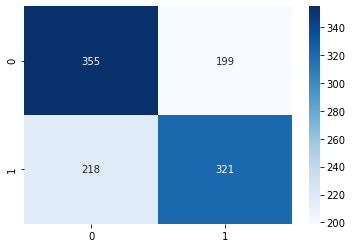

In [393]:
keras_2_cm = confusion_matrix(y_test, keras_grid_2.predict(X_continuous_test))

print(roc_auc_score(y_test, keras_grid_2.predict_proba(X_continuous_test)[:, 1]))

sns.heatmap(keras_2_cm, annot=True, fmt = 'd', cmap = 'Blues');

ROC AUC MLP1: 0.6748759234576667
ROC AUC MLP2: 0.6682149722376644


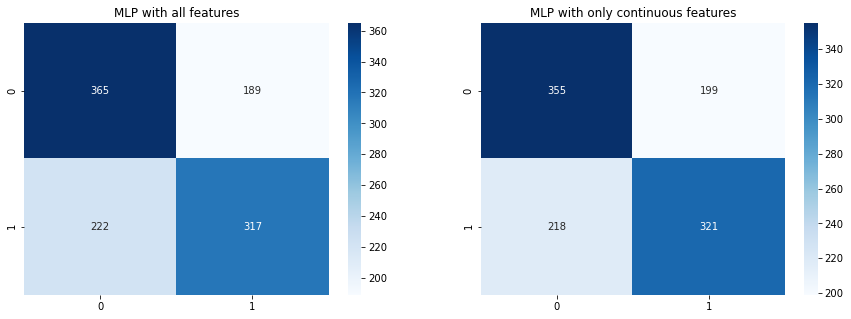

In [394]:
f, ax = plt.subplots(1, 2, figsize=(15,5))

sns.heatmap(ann_cm, annot=True, fmt = 'd', cmap = 'Blues', ax=ax[0]);
sns.heatmap(keras_2_cm, annot=True, fmt = 'd', cmap = 'Blues', ax=ax[1]);

ax[0].set_title('MLP with all features')
ax[1].set_title('MLP with only continuous features')

print('ROC AUC MLP1:', roc_auc_score(y_test, keras_grid.predict_proba(X_scale_test)[:, 1]))
print('ROC AUC MLP2:', roc_auc_score(y_test, keras_grid_2.predict_proba(X_continuous_test)[:, 1]))

# Offload Models:

In [498]:
import joblib

In [499]:
joblib.dump(xgbGrid.best_estimator_, 'xgb_clf')

['xgb_clf']

In [500]:
keras_grid_2.best_estimator_.model.save('mlp')

INFO:tensorflow:Assets written to: mlp\assets
